In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV 
import pickle

In [2]:
diabetic_data = pd.read_csv('diabetes.csv')

diabetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetic_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetic_data.shape

(768, 9)

In [29]:
diabetic_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetic_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
diabetic_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
X = np.array(diabetic_data.drop(columns='Outcome', axis=1))
Y = np.array(diabetic_data['Outcome'])

In [8]:
scalar = StandardScaler()

std_data = scalar.fit_transform(X)

X = std_data

In [9]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [12]:
classifier = svm.SVC(kernel='linear')

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [13]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [14]:
print('Accuracy Score of the training data : ', training_data_accuracy)

Accuracy Score of the training data :  0.7785016286644951


In [15]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [16]:
print('Accuracy Score of the test data : ', test_data_accuracy)

Accuracy Score of the test data :  0.7922077922077922


In [17]:
print(X_test_prediction)

[0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0
 0 0 0 1 0 0]


In [34]:
print(classification_report(Y_test, X_test_prediction)) 

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.73      0.65      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



<Axes: xlabel='Actual', ylabel='Predicted'>

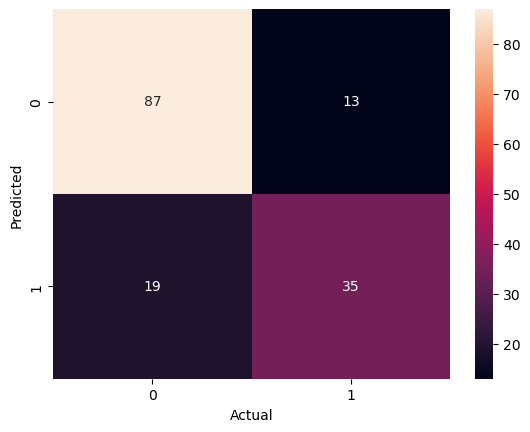

In [37]:
confusion_matrix = pd.crosstab(Y_test, X_test_prediction, colnames=['Actual'], rownames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [39]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

grid = GridSearchCV(classifier, param_grid, refit = True, 
                    return_train_score=True,
                          scoring='accuracy', verbose=10)
# fitting the model for grid search 
grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.652, test=0.650) total time=   0.0s
[CV 2/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.652, test=0.650) total time=   0.0s
[CV 3/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.652, test=0.650) total time=   0.0s
[CV 4/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.652, test=0.650) total time=   0.0s
[CV 5/5; 1/25] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/25] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.650, test=0.656) total time=   0.0s
[CV 1/5; 2/25] START C=0.1, gamma=0.1,

[CV 3/5; 10/25] END C=1, gamma=0.0001, kernel=rbf;, score=(train=0.652, test=0.650) total time=   0.0s
[CV 4/5; 10/25] START C=1, gamma=0.0001, kernel=rbf.............................
[CV 4/5; 10/25] END C=1, gamma=0.0001, kernel=rbf;, score=(train=0.652, test=0.650) total time=   0.0s
[CV 5/5; 10/25] START C=1, gamma=0.0001, kernel=rbf.............................
[CV 5/5; 10/25] END C=1, gamma=0.0001, kernel=rbf;, score=(train=0.650, test=0.656) total time=   0.0s
[CV 1/5; 11/25] START C=10, gamma=1, kernel=rbf.................................
[CV 1/5; 11/25] END C=10, gamma=1, kernel=rbf;, score=(train=1.000, test=0.691) total time=   0.0s
[CV 2/5; 11/25] START C=10, gamma=1, kernel=rbf.................................
[CV 2/5; 11/25] END C=10, gamma=1, kernel=rbf;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 3/5; 11/25] START C=10, gamma=1, kernel=rbf.................................
[CV 3/5; 11/25] END C=10, gamma=1, kernel=rbf;, score=(train=1.000, test=0.699) total ti

[CV 1/5; 20/25] END C=100, gamma=0.0001, kernel=rbf;, score=(train=0.772, test=0.748) total time=   0.0s
[CV 2/5; 20/25] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 2/5; 20/25] END C=100, gamma=0.0001, kernel=rbf;, score=(train=0.778, test=0.748) total time=   0.0s
[CV 3/5; 20/25] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 3/5; 20/25] END C=100, gamma=0.0001, kernel=rbf;, score=(train=0.766, test=0.797) total time=   0.0s
[CV 4/5; 20/25] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 4/5; 20/25] END C=100, gamma=0.0001, kernel=rbf;, score=(train=0.764, test=0.780) total time=   0.0s
[CV 5/5; 20/25] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 5/5; 20/25] END C=100, gamma=0.0001, kernel=rbf;, score=(train=0.776, test=0.762) total time=   0.0s
[CV 1/5; 21/25] START C=1000, gamma=1, kernel=rbf...............................
[CV 1/5; 21/25] END C=1000, gamma=1, kernel=rbf;, score=(train=1.000, 

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [41]:
new_model = grid.best_estimator_
new_model.score(X_test, Y_test)

0.7922077922077922

In [18]:
for i in range (len(X_test_prediction)):
  print(X_test_prediction[i], X_test[i], Y_test[i])

0 [ 0.63994726  0.09719231  0.14964075 -1.28821221 -0.69289057 -0.5575027
 -0.31371876 -0.36084741] 1
1 [ 2.12477957 -0.56004775 -0.05715025  1.22091023 -0.69289057  1.80319526
 -1.04458748  0.74529338] 0
0 [-0.25095213  0.84832379 -0.16054575  0.27998931 -0.69289057  0.0644016
 -0.65197205 -0.95646168] 0
1 [ 0.04601433  1.94372388 -3.57259724 -1.28821221 -0.69289057 -0.4559673
 -0.78485727  0.23476686] 1
0 [ 0.93691372 -0.21577915  0.35643175 -0.22183517  0.26222798 -1.03979583
 -0.01774713 -0.19067191] 0
0 [-1.14185152 -0.62264204  0.35643175 -1.28821221 -0.69289057  0.47054319
 -0.82713894 -0.61611067] 0
0 [-1.14185152 -0.62264204 -0.36733675 -1.28821221 -0.69289057 -1.2809424
 -0.41036256 -0.70119842] 0
1 [ 2.12477957  0.19108374  1.90736425 -1.28821221 -0.69289057  0.8893767
 -0.85129988  1.51108316] 0
0 [ 0.3429808  -0.15318486  0.25303625 -1.28821221 -0.69289057 -0.81134119
 -0.81807858 -0.27575966] 0
0 [-1.14185152  0.31627232  0.97680475 -1.28821221 -0.69289057 -0.04982572
  0

In [19]:
Input_data = (1,163,72,0,0,39,1.222,33)

Input_data_numpy =  np.asarray(Input_data)

Input_data_reshaped = Input_data_numpy.reshape(1, -1)

Input_std_data = scalar.transform(Input_data_reshaped)
print(Input_std_data)

data_prediction = classifier.predict(Input_std_data)
print(data_prediction)

if (data_prediction[0]== 0):
  print('The patient is non diabetic')
else:
  print('The patient is diabetic')

[[-0.84488505  1.31778097  0.14964075 -1.28821221 -0.69289057  0.8893767
   2.26546259 -0.0204964 ]]
[1]
The patient is diabetic


In [20]:
#X_test.shape

In [21]:
#X_test_size = X_test.shape[0]

In [22]:
#Y_Predict = []

#for i in range (X_test_size):
 # prediction = classifier.predict(X_test)
  #Y_Predict.append(prediction)

In [23]:
#print(X_test)

In [24]:
#print(Y_Predict)

In [25]:
filename = 'diabetics_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [26]:
loaded_model = pickle.load(open('diabetics_model.sav', 'rb'))

In [27]:
Input_data = (1,163,72,0,0,39,1.222,33)

Input_data_numpy =  np.asarray(Input_data)

Input_data_reshaped = Input_data_numpy.reshape(1, -1)

data_prediction = loaded_model.predict(Input_data_reshaped)
print(data_prediction)

if (data_prediction[0]== 0):
  print('The patient is non diabetic')
else:
  print('The patient is diabetic')

[1]
The patient is diabetic


In [28]:
for column in diabetic_data.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome
